<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El número de pasos por época en el entrenamiento de un modelo de deep learning depende del tamaño del dataset y el tamaño del batch (lote de datos).

Se calcula con la siguiente fórmula:

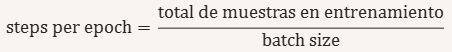

En tu caso, MNIST tiene 60,000 imágenes de entrenamiento, y el tamaño de batch por defecto en Keras suele ser 32. Calculamos:
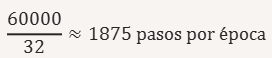

Esto significa que en cada época el modelo ve todas las imágenes del conjunto de entrenamiento, pero en lotes de 32 imágenes por vez.

🔹 Si aumentas el batch size, habrá menos pasos por época (por ejemplo, si usas batch_size=64, entonces steps per epoch = 937).

🔹 Si reduces el batch size, habrá más pasos (ej. batch_size=16 daría steps per epoch = 3750).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.8968 - loss: 0.3274 - val_accuracy: 0.9563 - val_loss: 0.1440
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9732 - loss: 0.0854 - val_accuracy: 0.9745 - val_loss: 0.0863
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9815 - loss: 0.0583 - val_accuracy: 0.9777 - val_loss: 0.0748
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9854 - loss: 0.0451 - val_accuracy: 0.9767 - val_loss: 0.0798
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.9884 - loss: 0.0362 - val_accuracy: 0.9769 - val_loss: 0.0864
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9897 - loss: 0.0327 - val_accuracy: 0.9803 - val_loss: 0.0747
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9766 - val_loss: 0.0916
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9921 -

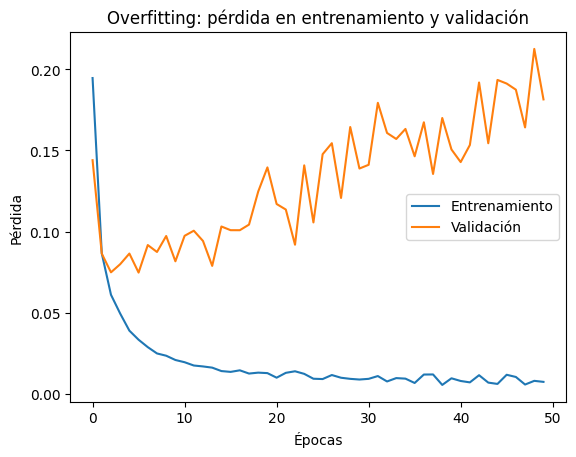

In [1]:
# 🔍 Explicación del Overfitting en este código:
# * El modelo es innecesariamente complejo con muchas capas y neuronas.
# * Entrenamos por 50 épocas, más de lo necesario, lo que lleva a sobreajuste.
# * La pérdida en el entrenamiento sigue bajando, pero la pérdida en validación comienza a subir después de varias épocas, indicando
#   overfitting.
# 🛠 Cómo evitar el overfitting:
# * Regularización: Agregar Dropout o L2 regularization.
# * Menos épocas: Detener el entrenamiento temprano con Early Stopping.
# * Aumento de datos: Aplicar data augmentation en imágenes.
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Cargar dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización

# Definir modelo con muchas capas para inducir overfitting
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),  # Capa grande
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Salida con 10 clases
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo con muchas épocas (posible overfitting)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Graficar pérdida de entrenamiento vs. validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Overfitting: pérdida en entrenamiento y validación')
plt.show()
